<a href="https://colab.research.google.com/github/neerajviswajith/CE888/blob/main/Lab7/Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import keras
keras.__version__

'2.4.3'

In [109]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [110]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [111]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Training the model with Embedding and SimpleRNN layers

In [112]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 27s 164ms/step - loss: 0.6508 - acc: 0.6055 - val_loss: 0.4272 - val_acc: 0.8286
Epoch 2/10
157/157 [==============================] - 25s 158ms/step - loss: 0.3730 - acc: 0.8479 - val_loss: 0.4217 - val_acc: 0.8150
Epoch 3/10
157/157 [==============================] - 25s 159ms/step - loss: 0.2732 - acc: 0.8930 - val_los

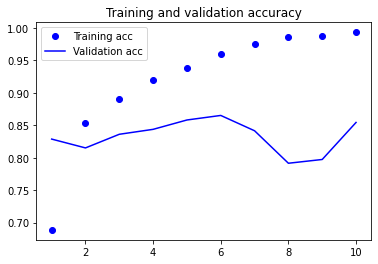

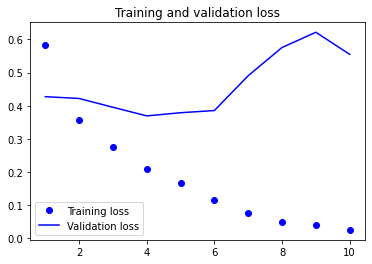

In [113]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training the model with Embedding and SimpleRNN layers

In [114]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 358ms/step - loss: 0.6093 - acc: 0.6692 - val_loss: 0.4448 - val_acc: 0.7884
Epoch 2/10
157/157 [==============================] - 60s 382ms/step - loss: 0.3187 - acc: 0.8740 - val_loss: 0.3369 - val_acc: 0.8574
Epoch 3/10
157/157 [==============================] - 59s 374ms/step - loss: 0.2338 - acc: 0.9127 - val_loss: 0.3036 - val_acc: 0.8716
Epoch 4/10
157/157 [==============================] - 60s 381ms/step - loss: 0.2057 - acc: 0.9242 - val_loss: 0.2936 - val_acc: 0.8750
Epoch 5/10
157/157 [==============================] - 60s 382ms/step - loss: 0.1710 - acc: 0.9396 - val_loss: 0.5736 - val_acc: 0.8200
Epoch 6/10
157/157 [==============================] - 59s 378ms/step - loss: 0.1713 - acc: 0.9427 - val_loss: 0.3755 - val_acc: 0.8458
Epoch 7/10
157/157 [==============================] - 59s 378ms/step - loss: 0.1358 - acc: 0.9517 - val_loss: 0.3132 - val_acc: 0.8884
Epoch 8/10
157/157 [==============================] - 5

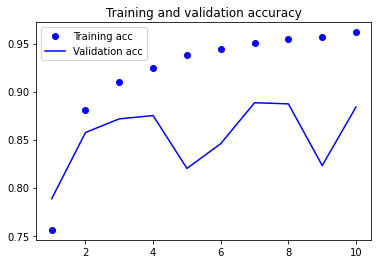

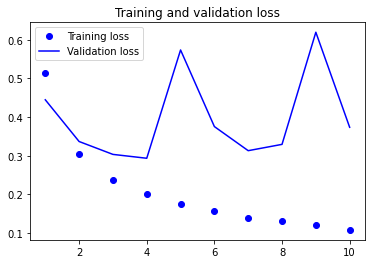

In [115]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Task 3: 

Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance?

#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



94/94 - 2s - loss: 0.0055
94/94 - 0s - loss: 0.0109
94/94 - 0s - loss: 0.0073
94/94 - 0s - loss: 0.0057
94/94 - 0s - loss: 0.0047
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0028
94/94 - 0s -

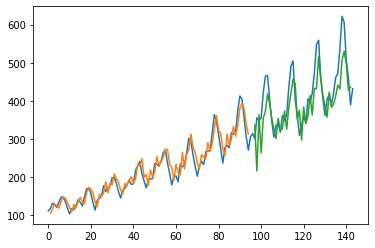

In [117]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
# Using Memory Between Batches
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()